<a href="https://colab.research.google.com/github/sephorakabeya/TP_IAA/blob/main/EXAMEN_IAA_NTANGA_KABEYA_Sephora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NTANGA KABEYA Sephora
#importation de bibliothèque
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Chargement du data set
df = pd.read_csv("/content/tmdb-movies_052843.csv")

In [ ]:
#visualisation de cinq premiere ligne
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
#Visualiser les colonnes
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
id,0
imdb_id,10
popularity,0
budget,0
revenue,0
original_title,0
cast,76
homepage,7930
director,44
tagline,2824


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
id,0
imdb_id,0
popularity,0
budget,0
revenue,0
original_title,0
cast,0
homepage,0
director,0
tagline,0


In [ ]:
#visualisation de ligne dupliquer

df.duplicated().sum()

np.int64(0)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


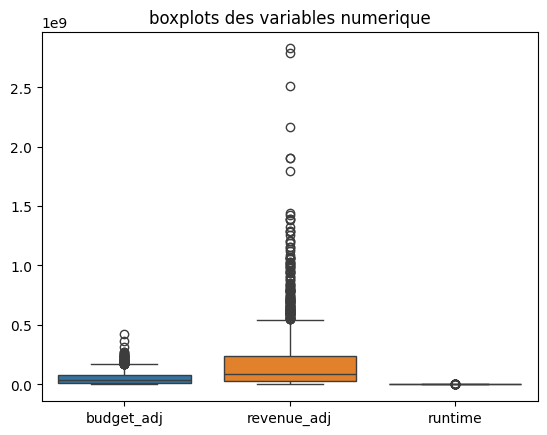

In [ ]:
#verification de la qualité
df = df.dropna(subset=['popularity', 'budget_adj', 'vote_count', 'runtime', 'vote_average', 'revenue_adj'])
df = df[df['budget_adj']> 0]
df = df[df['revenue_adj']> 0]
df = df[df['runtime']> 0]

#de type
print(df.dtypes)
#detection des outliers
sns.boxplot(data=df[['budget_adj','revenue_adj','runtime']])
plt.title("boxplots des variables numerique")
plt.show()

In [ ]:
features = ['popularity', 'budget_adj', 'vote_count', 'runtime', 'vote_average']
target = 'revenue_adj'
data_model = df [features+[target]].dropna()

In [ ]:
data_model

,popularity,budget_adj,vote_count,runtime,vote_average,revenue_adj
0,32.985763,1.379999e+08,5562,124,6.5,1.392446e+09
1,28.419936,1.379999e+08,6185,120,7.1,3.481613e+08
2,13.112507,1.012000e+08,2480,119,6.3,2.716190e+08
3,11.173104,1.839999e+08,5292,136,7.5,1.902723e+09
4,9.335014,1.747999e+08,2947,137,7.3,1.385749e+09
...,...,...,...,...,...,...
10595,1.549139,3.437812e+07,293,121,6.1,7.945168e+08
10689,1.910465,7.612620e+07,331,130,6.3,9.771535e+08
10724,1.778746,4.160985e+07,258,142,6.4,4.872780e+08
10759,1.198849,1.002810e+06,522,91,7.3,2.339890e+08


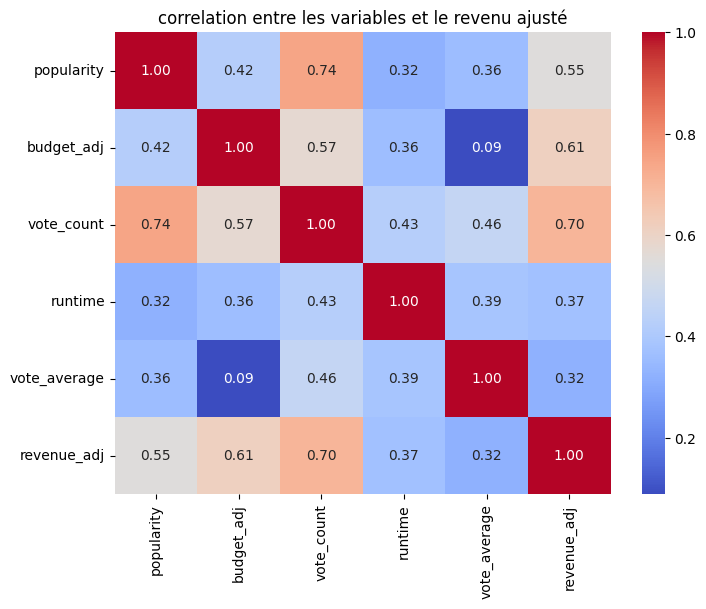

In [ ]:
# correlation avec la cible
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(data_model.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation entre les variables et le revenu ajusté")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#selection de variables
x = data_model[features]
y = data_model[target]
#division de données
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.4,random_state=42)

In [ ]:
#model

Model = LinearRegression()
Model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#prediction
y_pred = Model.predict(x_test)

In [ ]:
#evaluation
r2=r2_score(y_test,y_pred)

In [ ]:
#racine manuelle
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#affichage
print("Evaluation du model")

# Calcul du r2_score
r2 = r2_score(y_test, y_pred)

# Arrondir le résultat pour un meilleur affichage
r2_arrondi = round(r2, 4)

print(f"r2(coefficient de détermination):{r2_arrondi}")
print(f"RMSE: {rmse:,.2f}")

Evaluation du model
r2(coefficient de détermination):0.5486
RMSE: 211,313,360.98


In [ ]:
#comparaisson d'algorithmes

from sklearn.ensemble import GradientBoostingRegressor
lr_Model = LinearRegression()
lr_Model.fit(x_train, y_train)
y_pred_lr = lr_Model.predict(x_test)
gb_Model = GradientBoostingRegressor(random_state=42)
gb_Model.fit(x_train, y_train)
y_pred_gb = gb_Model.predict(x_test)

def eval_Model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f" {name}")
    print(f"R² : {r2:.4f}")
    print(f"RMSE : {rmse:.2f}\n")
eval_model("Régression linéaire", y_test, y_pred_lr)
eval_model("Gradient Boosting", y_test, y_pred_gb)

 Régression linéaire
R² : 0.5486
RMSE : 211313360.98

 Gradient Boosting
R² : 0.5052
RMSE : 221233199.32



Conclusion sur les performances des modèles

Les résultats obtenus pour la Régression Linéaire et le Gradient Boosting révèlent des performances relativement proches, mais avec une légère supériorité du modèle linéaire selon les deux métriques évaluées :

Analyse comparative :
Modèle      R² (↑ meilleur)    RMSE (↓ meilleur)         
 Régression Linéaire   0.5486         211 313 360.98         
 Gradient Boosting     0.5052           221 233 199.32             
- R² : La régression linéaire explique environ 54.86 % de la variance des données, contre 50.52 % pour le Gradient Boosting. Cela indique une meilleure capacité explicative du modèle linéaire dans ce cas.
- RMSE : L’erreur quadratique moyenne est plus faible pour la régression linéaire, ce qui signifie que ses prédictions sont globalement plus proches des valeurs réelles.
Interprétation :
Contrairement aux attentes générales où le Gradient Boosting surpasse souvent les modèles linéaires, ici la régression linéaire offre de meilleures performances. Cela peut s’expliquer par :
- Une relation linéaire dominante entre les variables.
- Un surapprentissage potentiel du modèle Gradient Boosting.
- Des hyperparamètres non optimisés pour le boosting.

Conclusion finale :
Dans ce contexte précis, la régression linéaire est le modèle le plus performant, tant en termes de précision que de capacité explicative. Toutefois, une exploration plus approfondie (feature engineering, tuning, validation croisée) pourrait permettre au Gradient Boosting de révéler son plein potentiel